### UTF-8방식이 아닌 csv파일..

In [232]:
# Jupyter Notebook에서 실행할 코드

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 로드 (사용자 지정 경로)
climate_path = "data/연도별_전국_기온.csv"
health_path = "data/말라리아.csv"

df_climate = pd.read_csv(climate_path, skiprows=6)
df_health = pd.read_csv(health_path)

df_climate.columns = ['연도', '지역', '평균기온(℃)', '평균최저기온(℃)', '평균최고기온(℃)']
df_health.columns = ['지역', '2018', '2019', '2020', '2021', '2022', '2023', '2024']

malaria_data = pd.melt(
    df_health,
    id_vars=['지역'],  # "지역"은 고정 컬럼
    var_name='연도',   # 새로 생성할 열 이름 (기존 컬럼 이름)
    value_name='말라리아'  # 새로 생성할 값 이름
)

# 관측지점 번호와 지역 이름 매핑 테이블 생성
station_to_region = {
    108: '서울', 159: '부산', 143: '대구', 112: '인천', 156: '광주',
    133: '대전', 152: '울산', 119: '경기', 105: '강원', 131: '충북',
    133: '충남', 146: '전북', 165: '전남', 136: '경북', 155: '경남',
    184: '제주', 133: '세종'  # 대전(133)과 세종 공유
}

# 매핑 테이블에 있는 값만 유지
df_climate = df_climate[df_climate['지역'].isin(station_to_region.keys())]
# 지역 정보 변환
df_climate['지역'] = df_climate['지역'].map(station_to_region)


KeyError: '연도'

In [224]:
df_climate

,연도,지역,평균기온(℃),평균최저기온(℃),평균최고기온(℃)
40,2018.0,강원,13.7,9.8,18.0
42,2018.0,서울,12.9,8.8,17.9
43,2018.0,인천,12.5,9.2,16.3
46,2018.0,경기,12.7,7.9,18.5
51,2018.0,충북,13.5,9.1,18.7
...,...,...,...,...,...
597,2024.0,경남,16.2,12.3,21.1
598,2024.0,광주,16.0,12.0,20.9
599,2024.0,부산,16.7,13.4,20.9
601,2024.0,전남,15.7,12.6,19.5


In [220]:
df_health

,지역,연도,말라리아
0,서울,2018,82
1,부산,2018,9
2,대구,2018,13
3,인천,2018,82
4,광주,2018,5
...,...,...,...
114,전남,2024,4
115,경북,2024,3
116,경남,2024,3
117,제주,2024,0


In [157]:
# 데이터 병합
merged_data = pd.merge(df_climate, malaria_data, on=['연도','지역'])

# 병합된 데이터 확인
print(merged_data)

       연도  지역  평균기온(℃)  평균최저기온(℃)  평균최고기온(℃)  말라리아
0    2018  강원     13.7        9.8       18.0    11
1    2018  서울     12.9        8.8       17.9    82
2    2018  인천     12.5        9.2       16.3    82
3    2018  경기     12.7        7.9       18.5   325
4    2018  충북     13.5        9.1       18.7     3
..    ...  ..      ...        ...        ...   ...
100  2024  경남     16.2       12.3       21.1     3
101  2024  광주     16.0       12.0       20.9     1
102  2024  부산     16.7       13.4       20.9     2
103  2024  전남     15.7       12.6       19.5     4
104  2024  제주     18.2       15.4       21.4     0

[105 rows x 6 columns]


In [159]:
# 기본 통계량
print(merged_data.describe())

          평균기온(℃)   평균최저기온(℃)   평균최고기온(℃)        말라리아
count  105.000000  105.000000  105.000000  105.000000
mean    14.502857   10.416190   19.304762   29.133333
std      1.173789    1.654023    1.044618   70.223143
min     12.500000    6.900000   16.300000    0.000000
25%     13.700000    9.400000   18.700000    2.000000
50%     14.500000   10.300000   19.400000    4.000000
75%     15.100000   11.100000   20.000000   13.000000
max     18.200000   15.400000   21.400000  434.000000


In [161]:
# 결측치 확인
print(merged_data.isnull().sum())

연도           0
지역           0
평균기온(℃)      0
평균최저기온(℃)    0
평균최고기온(℃)    0
말라리아         0
dtype: int64


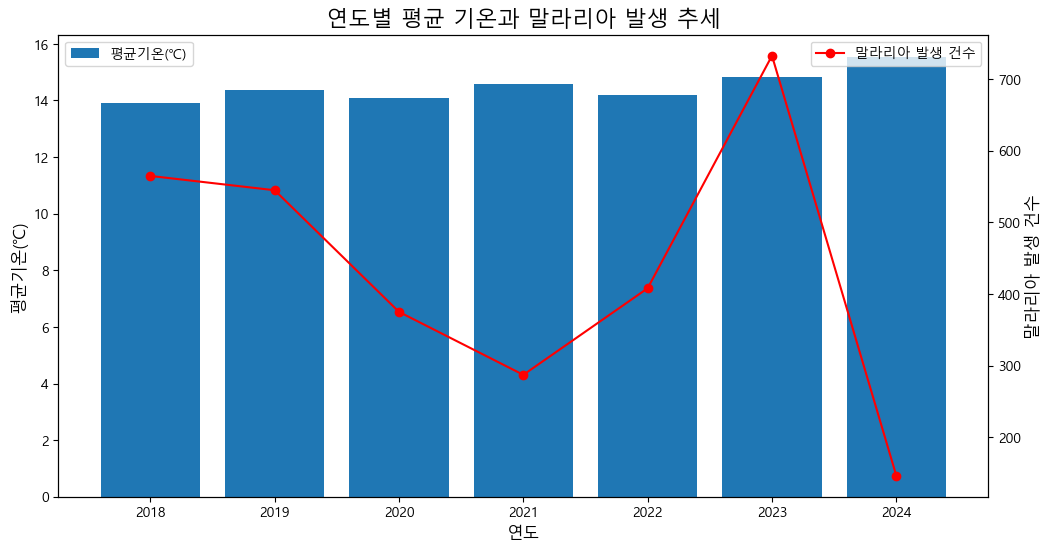

In [181]:
import matplotlib.pyplot as plt

# 연도별 평균 기온과 말라리아 발생 데이터 준비
yearly_data = merged_data.groupby('연도').agg({
    '평균기온(℃)': 'mean',  # 평균 기온의 평균값
    '말라리아': 'sum'       # 말라리아 발생 건수 합계
}).reset_index()

# 그래프 크기 설정
fig, ax1 = plt.subplots(figsize=(12, 6))

# 막대 그래프: 평균 기온
ax1.bar(yearly_data['연도'], yearly_data['평균기온(℃)'], label='평균기온(℃)')
ax1.set_xlabel('연도', fontsize=12)
ax1.set_ylabel('평균기온(℃)', fontsize=12)
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

# 꺾은선 그래프: 말라리아 발생 건수 (두 번째 축 사용)
ax2 = ax1.twinx()
ax2.plot(yearly_data['연도'], yearly_data['말라리아'], color='red', marker='o', label='말라리아 발생 건수')
ax2.set_ylabel('말라리아 발생 건수', fontsize=12)
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

# 그래프 제목
plt.title('연도별 평균 기온과 말라리아 발생 추세', fontsize=16)

# 그래프 출력
plt.show()


In [179]:
import matplotlib.pyplot as plt
from matplotlib import rc
import platform

plt.rc('font', family='Malgun Gothic')

## 데이터 전처리

### 1. 컬럼 명 통일

In [187]:
column_mapping = {
    "년월": "연도", 
    "날짜": "연도",
    "년": "연도", 
    "기온": "평균기온",
    "시도": "지역",
}

##data.rename(columns=column_mapping, inplace=True)

### 데이터 전처리 자동화

In [190]:
def preprocess_data(df, column_mapping):
    df.rename(columns=column_mapping, inplace=True)
    df["연도"] = pd.to_datetime(df["연도"], errors='coerce').dt.year  # 연도 변환
    return df

In [194]:
df_climate

,연도,지역,평균기온(℃),평균최저기온(℃),평균최고기온(℃)
40,2018,강원,13.7,9.8,18.0
42,2018,서울,12.9,8.8,17.9
43,2018,인천,12.5,9.2,16.3
46,2018,경기,12.7,7.9,18.5
51,2018,충북,13.5,9.1,18.7
...,...,...,...,...,...
597,2024,경남,16.2,12.3,21.1
598,2024,광주,16.0,12.0,20.9
599,2024,부산,16.7,13.4,20.9
601,2024,전남,15.7,12.6,19.5
